# Neural Network Model (Multi-Layered)

- This model has been implemented from scratch using the libraries **NumPy** and **Matplotlib**.

In [ ]:
from google.colab import files
files.upload()

Saving neural_network_multilayer.py to neural_network_multilayer.py


{'neural_network_multilayer.py': b'\'\'\' Multilayered Neural Network \'\'\'\r\n\r\n# Importing necessary libraries\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\n\r\nclass NeuralNetwork:\r\n\r\n    def __init__(self,lr=0.5,lamda=0.15,num_iters=50,hidden_layer_sizes=[16,16,16,16],batch_size=500,activation=\'sigmoid\'):\r\n        \'\'\' \'__init__\' takes arguments as Learning Rate(lr), Regularization Constant(lamda), Number of Iterations(num_iters), layers(Hidden Layer Size as a list), Batch Size, func(Type of activation function) \'\'\'\r\n        # All these parameters have been initialized by their default values, they can be changed when required\r\n        self.lr = lr\r\n        self.lamda = lamda\r\n        self.num_iters = num_iters\r\n        self.layers = hidden_layer_sizes\r\n        self.bs = batch_size\r\n        self.func = activation\r\n\r\n    \'\'\' Sigmoid function maps all the values in the range of 0 to 1 \'\'\'\r\n    def sigmoid_function(self,z):\r\n

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Collecting the data

In [ ]:
# Importing, splitting and assigning the training data
train_dataset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
Xtrain = np.array(train_dataset.iloc[:,1:])
ytrain = np.array(train_dataset.iloc[:,0:1])

# Importing, splitting and assigning the testing data
test_dataset = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
Xtest = np.array(test_dataset.iloc[:,1:])
ytest = np.array(test_dataset.iloc[:,0:1])

In [ ]:
train_samples = Xtrain.shape[0]
test_samples = Xtest.shape[0]
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(20000, 784) (20000, 1)
(10000, 784) (10000, 1)


- Training Dataset consists of 20000 samples.

- Testing Dataset consists of 10000 samples.

- Output of a sample is a single digit non negative integer.

In [ ]:
n_class = len(np.unique(ytrain))
print("Number of classes in the output:",n_class)

Number of classes in the output: 10


## Mini Batch Gradient Descent

- Entire data is split into $\frac{train\_samples}{500} = \frac{20000}{500} = 40$ batches, with each batch has 500 samples.

- The activation function for the output layer is **Sigmoid**.

- Hidden Layers activations : **Sigmoid**, **Tanh**, and **ReLU**.

In [ ]:
from neural_network_multilayer import NeuralNetwork

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Activation Function","Training Accuracy","Testing Accuracy"]

### Sigmoid Activation Function
  
    Time taken to train the model: 15s.

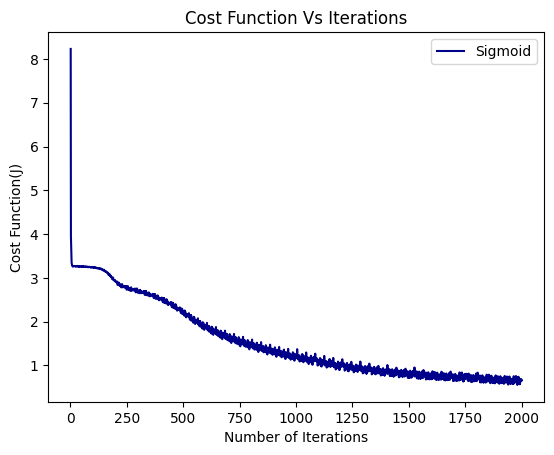

In [ ]:
m1 = NeuralNetwork(lr=0.5,lamda=0.15,num_iters=50,hidden_layer_sizes=[16,16,16,16],batch_size=500,activation='sigmoid')
# Takes Xtrain, ytrain and n_class as its arguments and update the weights
m1.fit(Xtrain,ytrain,n_class)
y1pred = m1.predict(Xtrain)
yt1pred = m1.predict(Xtest)
m1.plot("Sigmoid") # Plotting (Cost Function vs Iterations)
train_accuracy = m1.accuracy(ytrain,y1pred)
test_accuracy = m1.accuracy(ytest,yt1pred)
table.add_row(["Sigmoid",train_accuracy,test_accuracy])

### Tanh Activation Function

    Time taken to train the model: 19s.

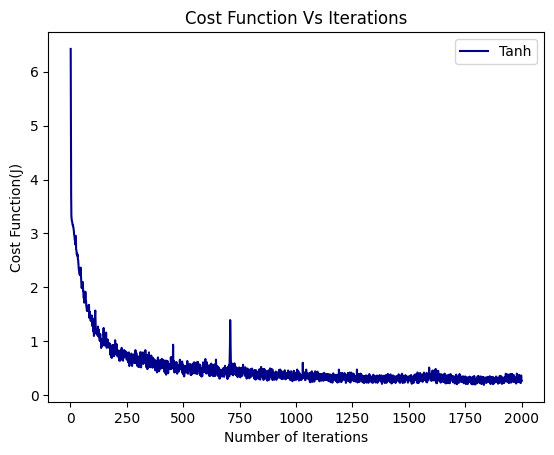

In [ ]:
m2 = NeuralNetwork(lr=0.5,lamda=0.15,num_iters=50,hidden_layer_sizes=[16,16,16,16],batch_size=500,activation='tanh')
# Takes Xtrain, ytrain and n_class as its arguments and update the weights
m2.fit(Xtrain,ytrain,n_class)
y2pred = m2.predict(Xtrain)
yt2pred = m2.predict(Xtest)
m2.plot("Tanh") # Plotting (Cost Function vs Iterations)
train_accuracy = m2.accuracy(ytrain,y2pred)
test_accuracy = m2.accuracy(ytest,yt2pred)
table.add_row(["Tanh",train_accuracy,test_accuracy])

### ReLU Activation Function

    Time taken to train the model: 11s.

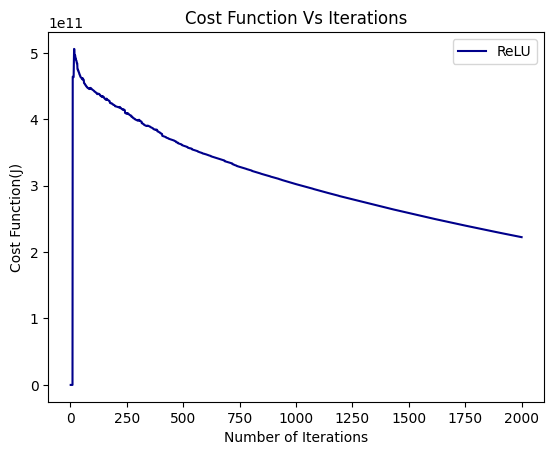

In [ ]:
m3 = NeuralNetwork(lr=0.5,lamda=0.15,num_iters=50,hidden_layer_sizes=[16,16,16,16],batch_size=500,activation='relu')
# Takes Xtrain, ytrain and n_class as its arguments and update the weights
m3.fit(Xtrain,ytrain,n_class)
y3pred = m3.predict(Xtrain)
yt3pred = m3.predict(Xtest)
m3.plot("ReLU") # Plotting (Cost Function vs Iterations)
train_accuracy = m3.accuracy(ytrain,y3pred)
test_accuracy = m3.accuracy(ytest,yt3pred)
table.add_row(["ReLU",train_accuracy,test_accuracy])

### Overall Summary of Multi Layered Neural Network

In [ ]:
print(table)

+---------------------+-------------------+------------------+
| Activation Function | Training Accuracy | Testing Accuracy |
+---------------------+-------------------+------------------+
|       Sigmoid       |       95.815      |      89.98       |
|         Tanh        | 97.85000000000001 |      90.33       |
|         ReLU        |        9.81       |       9.8        |
+---------------------+-------------------+------------------+


> The above model took less computation time as compared to Scikit learn model. **ReLU** function couldn't able to get efficient results, whereas **Tanh** function produced highest training and testing accuracy.

## Multi-Layered Neural Network using scikit-learn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
Xtrain = preprocessing.scale(Xtrain)
ytrain = ytrain.ravel()
Xtest = preprocessing.scale(Xtest)
ytest = ytest.ravel()

In [ ]:
from prettytable import PrettyTable
sk_table = PrettyTable()
sk_table.field_names = ["Activation Function","Training Accuracy","Testing Accuracy"]

### Sigmoid Activation Function

    Time taken to train the model: 2m 14s.

In [ ]:
sk1 = MLPClassifier(hidden_layer_sizes=(16,16,16,16), activation='logistic')
sk1.fit(Xtrain,ytrain)
train_accuracy = sk1.score(Xtrain,ytrain) * 100
test_accuracy = sk1.score(Xtest,ytest) * 100
sk_table.add_row(["Sigmoid",train_accuracy,test_accuracy])

### Tanh Activation Function

    Time taken to train the model: 1m 32s.

In [ ]:
sk2 = MLPClassifier(hidden_layer_sizes=(16,16,16,16), activation='tanh')
sk2.fit(Xtrain,ytrain)
train_accuracy = sk2.score(Xtrain,ytrain) * 100
test_accuracy = sk2.score(Xtest,ytest) * 100
sk_table.add_row(["Tanh",train_accuracy,test_accuracy])

### ReLU Activation Function

    Time taken to train the model: 41s.

In [ ]:
sk3 = MLPClassifier(hidden_layer_sizes=(40), activation='relu')
sk3.fit(Xtrain,ytrain)
train_accuracy = sk3.score(Xtrain,ytrain) * 100
test_accuracy = sk3.score(Xtest,ytest) * 100
sk_table.add_row(["ReLU",train_accuracy,test_accuracy])

### Overall Summary of Scikit-learn model

In [ ]:
print(sk_table)

+---------------------+-------------------+-------------------+
| Activation Function | Training Accuracy |  Testing Accuracy |
+---------------------+-------------------+-------------------+
|       Sigmoid       | 99.02499999999999 |       84.15       |
|         Tanh        |       99.83       | 88.64999999999999 |
|         ReLU        |       100.0       |       94.31       |
+---------------------+-------------------+-------------------+


> Scikit learn model is highly efficient for all types of activation functions.